##### Copyright 2020 The Cirq Developers

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Cirq basics

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/tutorials/basics"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/master/docs/tutorials/basics.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/master/docs/tutorials/basics.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/tutorials/basics.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

This tutorial will teach the basics of how to use Cirq.  This tutorial will walk through how to use qubits, gates, and operations to create and simulate your first quantum circuit using Cirq.  It will briefly introduce devices, unitary matrices, decompositions, and transformers.

This tutorial isn’t a quantum computing 101 tutorial, we assume familiarity of quantum computing at about the level of the textbook “Quantum Computation and Quantum Information” by Nielsen and Chuang.

For more in-depth examples closer to those found in current work, check out our tutorials page.

To begin, please follow the instructions for [installing Cirq](../install.md).

Note: this notebook relies on unreleased Cirq features. If you want to try these features, make sure you install cirq via `pip install cirq --pre`.

In [2]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq
    print("installed cirq.")

## Qubits

The first part of creating a quantum circuit is to define a set of qubits (also known as a quantum registers) to act on.

Cirq has three main ways of defining qubits:

*   `cirq.NamedQubit`: used to label qubits by an abstract name
*   `cirq.LineQubit`: qubits labelled by number in a linear array 
*   `cirq.GridQubit`: qubits labelled by two numbers in a rectangular lattice.

Here are some examples of defining each type of qubit.

In [3]:
import cirq_google

# Using named qubits can be useful for abstract algorithms
# as well as algorithms not yet mapped onto hardware.
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

# Line qubits can be created individually
q3 = cirq.LineQubit(3)

# Or created in a range
# This will create LineQubit(0), LineQubit(1), LineQubit(2)
q0, q1, q2 = cirq.LineQubit.range(3)

# Grid Qubits can also be referenced individually
q4_5 = cirq.GridQubit(4,5)

# Or created in bulk in a square
# This will create 16 qubits from (0,0) to (3,3)
qubits = cirq.GridQubit.square(4)

There are also pre-packaged sets of qubits called [Devices](../devices.md).  These are qubits along with a set of rules of how they can be used.  A `cirq.Device` can be used to apply adjacency rules and other hardware constraints to a quantum circuit.  For our example, we will use the `cirq_google.Sycamore` device that comes with cirq.  It is a 2x11 grid that mimics early hardware released by Google.

Sycamore itu quantum processor yang dibuat Google, ada hardwarenya, tapi ini hanya simulasi dari *device* aslinya

In [4]:
print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

## Gates and operations

The next step is to use the qubits to create operations that can be used in our circuit.  Cirq has two concepts that are important to understand here:

*   A `Gate` is an effect that can be applied to a set of qubits.  
*   An `Operation` is a gate applied to a set of qubits.

For instance, `cirq.H` is the quantum [Hadamard](https://en.wikipedia.org/wiki/Quantum_logic_gate#Hadamard_(H)_gate) and is a `Gate` object.  `cirq.H(cirq.LineQubit(1))` is an `Operation` object and is the Hadamard gate applied to a specific qubit (line qubit number 1).

Many textbook gates are included within cirq.  `cirq.X`, `cirq.Y`, and `cirq.Z` refer to the single-qubit Pauli gates.  `cirq.CZ`, `cirq.CNOT`, `cirq.SWAP` are a few of the common two-qubit gates.  `cirq.measure` is a macro to apply a `MeasurementGate` to a set of qubits.  You can find more, as well as instructions on how to creats your own custom gates, on the [Gates documentation](../gates.ipynb) page.

Many arithmetic operations can also be applied to gates.  Here are some examples:

In [5]:
# Example gates
not_gate = cirq.CNOT
pauli_z = cirq.Z

# Using exponentiation to get square root gates
sqrt_x_gate = cirq.X**0.5

# Some gates can also take parameters
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

# Example operations
q0, q1 = cirq.LineQubit.range(2)
z_op = cirq.Z(q0)
not_op = cirq.CNOT(q0, q1)
sqrt_iswap_op = cirq.SQRT_ISWAP(q0, q1)

## Circuits and moments

We are now ready to construct a quantum circuit.  A `Circuit` is a collection of `Moment`s. A `Moment` is a collection of `Operation`s that all act during the same abstract time slice.  Each `Operation` must have a disjoint set of qubits from the other `Operation`s in the `Moment`.  A `Moment` can be thought of as a vertical slice of a quantum circuit diagram.

Circuits can be constructed in several different ways.  By default, cirq will attempt to slide your operation into the earliest possible `Moment` when you insert it.


In [28]:
circuit = cirq.Circuit()
# You can create a circuit by appending to it
line_qubits = cirq.LineQubit.range(3)
circuit.append(cirq.H(q) for q in line_qubits)
circuit.append(cirq.Z(line_qubits[0]))

circuit.append(cirq.Z(line_qubits[1]))
circuit.append(cirq.SWAP(line_qubits[0], line_qubits[2]))
circuit.append(cirq.SWAP(line_qubits[0], line_qubits[1]))
circuit.append(cirq.SWAP(line_qubits[2], line_qubits[1]))

# All of the gates are put into the same Moment since none overlap
print(circuit)

0: ───H───Z───×───×───────
              │   │
1: ───H───Z───┼───×───×───
              │       │
2: ───H───────×───────×───


In [7]:
# We can also create a circuit directly as well:
print(cirq.Circuit(cirq.SWAP(q, q+1) for q in cirq.LineQubit.range(3)))

0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


Sometimes, you may not want cirq to automatically shift operations all the way to the left.  To construct a circuit without doing this, you can create the circuit moment-by-moment or use a different `InsertStrategy`, explained more in the [Circuit documentation](../circuits.ipynb).

In [8]:
# Creates each gate in a separate moment.
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───


### Circuits and devices

One important consideration when using real quantum devices is that there are often hardware constraints on the circuit.  Creating a circuit with a `Device` will allow you to capture some of these requirements.  `Device`s can be used to validate your circuit to make sure that it contains no illegal operations.

Let's look at an example using the Sycamore Device:

In [22]:
q0 = cirq.GridQubit(5, 6)
q1 = cirq.GridQubit(5, 5)
q2 = cirq.GridQubit(4, 5)
adjacent_op = cirq_google.SYC(q0, q1)
nonadjacent_op = cirq_google.SYC(q0, q2)

# A working circuit for the Sycamore device raises no issues.
working_circuit = cirq.Circuit()
working_circuit.append(adjacent_op)
valid = cirq_google.Sycamore.validate_circuit(working_circuit)
print(working_circuit)

# A circuit using invalid operations.
bad_circuit = cirq.Circuit()
bad_circuit.append(nonadjacent_op)
try:
  cirq_google.Sycamore.validate_circuit(bad_circuit)
except ValueError as e:
  print(e)
print(bad_circuit)


(5, 5): ───SYC───
           │
(5, 6): ───SYC───
Operation does not use valid qubit target: SYC((5, 6), (4, 5)).
(4, 5): ───SYC───
           │
(5, 6): ───SYC───


## Simulation

The results of the application of a quantum circuit can be calculated by a `Simulator`.  Cirq comes bundled with a simulator that can calculate the results of circuits up to about a limit of 20 qubits.  It can be initialized with `cirq.Simulator()`.

There are two different approaches to using a simulator:

*   `simulate()`:  Since we are classically simulating a circuit, a simulator can directly access and view the resulting wave function.  This is useful for debugging, learning, and understanding how circuits will function.  
*   `run()`:  When using actual quantum devices, we can only access the end result of a computation and must sample the results to get a distribution of results.  Running the simulator as a sampler mimics this behavior and only returns bit strings as output.

Let's try to simulate a 2-qubit "Bell State":

In [44]:
# Create a circuit to generate a Bell State:
# 1/sqrt(2) * ( |00⟩ + |11⟩ )
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0,q1))
print(bell_circuit)

# Initialize Simulator
s=cirq.Simulator()

print('Simulate the circuit:')
results=s.simulate(bell_circuit)
print(results)
print()

# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))
bell_circuit.append(cirq.measure(q0, key='a'))
bell_circuit.append(cirq.measure(q1, key='b'))
print(bell_circuit)

print('Sample the circuit:')
samples=s.run(bell_circuit, repetitions=10000)
# Print a histogram of results
print(samples.histogram(key='a'))
print(samples.histogram(key='b'))
print(samples.histogram(key='result'))

0: ───H───@───
          │
1: ───────X───
Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩

0: ───H───@───M('result')───M('a')───
          │   │
1: ───────X───M─────────────M('b')───
Sample the circuit:
Counter({0: 5006, 1: 4994})
Counter({0: 5006, 1: 4994})
Counter({0: 5006, 3: 4994})


### Using parameter sweeps

Cirq circuits allow for gates to have symbols as free parameters within the circuit.  This is especially useful for variational algorithms, which vary parameters within the circuit in order to optimize a cost function, but it can be useful in a variety of circumstances.

For parameters, cirq uses the library `sympy` to add `sympy.Symbol` as parameters to gates and operations.  

Once the circuit is complete, you can fill in the possible values of each of these parameters with a `Sweep`.  There are several possibilities that can be used as a sweep:

*   `cirq.Points`: A list of manually specified values for one specific symbol as a sequence of floats
*   `cirq.Linspace`: A linear sweep from a starting value to an ending value.
*   `cirq.ListSweep`: A list of manually specified values for several different symbols, specified as a list of dictionaries.
*   `cirq.Zip` and `cirq.Product`: Sweeps can be combined list-wise by zipping them together or through their Cartesian product.

A parameterized circuit and sweep together can be run using the simulator or other sampler by changing `run()` to `run_sweep()` and adding the sweep as a parameter.

Here is an example of sweeping an exponent of a X gate:

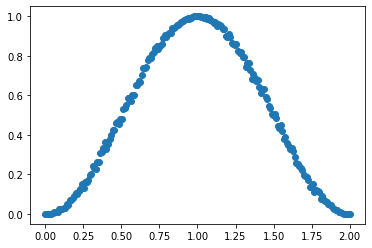

In [11]:
import matplotlib.pyplot as plt
import sympy

# Perform an X gate with variable exponent
q = cirq.GridQubit(1,1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'),
                       cirq.measure(q, key='m'))

# Sweep exponent from zero (off) to one (on) and back to two (off)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot all the results
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t','p', data={'t': x_data, 'p': y_data})


## Unitary matrices and decompositions

Most quantum operations have a unitary matrix representation.  This matrix can be accessed by applying `cirq.unitary()`.  This can be applied to gates, operations, and circuits that support this protocol and will return the unitary matrix that represents the object.

In [12]:
print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0, q1))))

Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Unitary of a sample circuit
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


### Decompositions 

Many gates can be decomposed into an equivalent circuit with simpler operations and gates.  This is called decomposition and can be accomplished with the `cirq.decompose` protocol.  

For instance, a Hadamard H gate can be decomposed into X and Y gates:

In [13]:
print(cirq.decompose(cirq.H(cirq.LineQubit(0))))

[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(global_shift=-0.25).on(cirq.LineQubit(0))]


Another example is the 3-qubit Toffoli gate, which is equivalent to a controlled-controlled-X gate.  Many devices do not support a three qubit gate, so it is important 

In [14]:
q0, q1, q2 = cirq.LineQubit.range(3)
print(cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0, q1, q2))))

0: ───T────────────────@─────────────────────────────────@─────────────────────────────@────────────────────────────@───────────────────────────────────────
                       │                                 │                             │                            │
1: ───T───────Y^-0.5───@───Y^0.5────@───T^-1────Y^-0.5───@────────Y^0.5───@───Y^-0.5───@──────Y^0.5────@───Y^-0.5───@──────Y^0.5────@───────────────────────
                                    │                                     │                            │                            │
2: ───Y^0.5───X────────T───Y^-0.5───@───Y^0.5───T────────Y^-0.5───────────@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5───Y^0.5───X───


The above decomposes the Toffoli into a simpler set of one-qubit gates and CZ gates at the cost of lengthening the circuit considerably.

### Transformers

The last concept in this tutorial is the transformer.  An transformer can take a circuit and modify it.  Usually, this will entail combining or modifying operations to make it more efficient and shorter, though an transformer can, in theory, do any sort of circuit manipulation.

For example, the `cirq.merge_single_qubit_gates_to_phxz` transformer will take consecutive single-qubit operations and merge them into a single `PhasedXZ` operation.

In [15]:
q=cirq.GridQubit(1, 1)
c=cirq.Circuit(cirq.X(q) ** 0.25, cirq.Y(q) ** 0.25, cirq.Z(q) ** 0.25)
print(c)
c = cirq.merge_single_qubit_gates_to_phxz(c)
print(c)

(1, 1): ───X^0.25───Y^0.25───T───
(1, 1): ───PhXZ(a=0.304,x=0.333,z=0.142)───


Other transformers can assist in transforming a circuit into operations that are native operations on specific hardware devices.  You can find more about transformers and how to create your own elsewhere in the documentation.

## Next steps

After completing this tutorial, you should be able to use gates and operations to construct your own quantum circuits, simulate them, and to use sweeps.  It should give you a brief idea of the commonly used 

There is much more to learn and try out for those who are interested:

* Learn about the variety of [Gates](../gates.ipynb) available in cirq and more about the different ways to construct [Circuits](../circuits.ipynb)
* Learn more about [Simulations](../simulation.ipynb) and how it works.
* Learn about [Noise](../noise.ipynb) and how to utilize multi-level systems using [Qudits](../qudits.ipynb)
* Dive into some [Examples](_index.yaml) and some in-depth tutorials of how to use cirq.

Also, join our [cirq-announce mailing list](https://groups.google.com/forum/#!forum/cirq-announce) to hear about changes and releases or go to the [cirq github](https://github.com/quantumlib/Cirq/) to file issues.

In [46]:
# pylint: disable=wrong-or-nonexistent-copyright-notice
"""Demonstrates Shor's algorithm.

Shor's algorithm [1] is a quantum algorithm for integer factorization. Given
a composite integer n, it finds its non-trivial factor d, i.e. a factor other
than 1 or n.

The algorithm consists of two parts: quantum order-finding subroutine and
classical probabilistic reduction of the factoring problem to the order-
finding problem. Given two positive integers x and n, the order-finding
problem asks for the smallest positive integer r such that x**r mod n == 1.

The classical reduction algorithm first handles two corner cases which do
not rely on quantum computation: when n is even or a prime power. For other
n, the algorithm first draws a random x uniformly from 2..n-1 and then uses
the quantum order-finding subroutine to compute the order r of x modulo n,
i.e. it finds the smallest positive integer r such that x**r == 1 mod n. Now,
if r is even, then y = x**(r/2) is a solution to the equation

    y**2 == 1 mod n.                                                   (*)

It's easy to see that in this case gcd(y - 1, n) or gcd(y + 1, n) divides n.
If in addition y is a non-trivial solution, i.e. if it is not equal to -1,
then gcd(y - 1, n) or gcd(y + 1, n) is a non-trivial factor of n (note that
y cannot be 1). If r is odd or if y is a trivial solution of (*), then the
algorithm is repeated for a different random x.

It turns out [1] that the probability of r being even and y = x**(r/2) being
a non-trivial solution of equation (*) is at least 1 - 1/2**(k - 1) where k
is the number of distinct prime factors of n. Since the case k = 1 has been
handled by the classical part, we have k >= 2 and the success probability of
a single attempt is at least 1/2.

The subroutine for finding the order r of a number x modulo n consists of two
steps. In the first step, Quantum Phase Estimation is applied to a unitary such
as

    U|y⟩ = |xy mod n⟩  0 <= y < n
    U|y⟩ = |y⟩         n =< y

whose eigenvalues are s/r for s = 0, 1, ..., r - 1. In the second step, the
classical continued fractions algorithm is used to recover r from s/r. Note
that when gcd(s, r) > 1 then an incorrect r is found. This can be detected
by verifying that r is indeed the order of x. If it is not, Quantum Phase
Estimation algorithm is retried.

[1]: https://arxiv.org/abs/quant-ph/9508027
"""

import argparse
import fractions
import math
import random

from typing import Callable, List, Optional, Sequence, Union

import sympy

import cirq

parser = argparse.ArgumentParser(description='Factorization demo.')
parser.add_argument('n', type=int, help='composite integer to factor')
parser.add_argument(
    '--order_finder',
    type=str,
    choices=('naive', 'quantum'),
    default='naive',
    help=(
        'order finder to use; must be either "naive" '
        'for a naive classical algorithm or "quantum" '
        'for a quantum circuit; note that in practice '
        '"quantum" is substantially slower since it '
        'incurs the overhead of classical simulation.'
    ),
)


def naive_order_finder(x: int, n: int) -> Optional[int]:
    """Computes smallest positive r such that x**r mod n == 1.

    Args:
        x: integer whose order is to be computed, must be greater than one
           and belong to the multiplicative group of integers modulo n (which
           consists of positive integers relatively prime to n),
        n: modulus of the multiplicative group.

    Returns:
        Smallest positive integer r such that x**r == 1 mod n.
        Always succeeds (and hence never returns None).

    Raises:
        ValueError: When x is 1 or not an element of the multiplicative
            group of integers modulo n.
    """
    if x < 2 or n <= x or math.gcd(x, n) > 1:
        raise ValueError(f'Invalid x={x} for modulus n={n}.')
    r, y = 1, x
    while y != 1:
        y = (x * y) % n
        r += 1
    return r


class ModularExp(cirq.ArithmeticOperation):
    """Quantum modular exponentiation.

    This class represents the unitary which multiplies base raised to exponent
    into the target modulo the given modulus. More precisely, it represents the
    unitary V which computes modular exponentiation x**e mod n:

        V|y⟩|e⟩ = |y * x**e mod n⟩ |e⟩     0 <= y < n
        V|y⟩|e⟩ = |y⟩ |e⟩                  n <= y

    where y is the target register, e is the exponent register, x is the base
    and n is the modulus. Consequently,

        V|y⟩|e⟩ = (U**e|r⟩)|e⟩

    where U is the unitary defined as

        U|y⟩ = |y * x mod n⟩      0 <= y < n
        U|y⟩ = |y⟩                n <= y

    in the header of this file.

    Quantum order finding algorithm (which is the quantum part of the Shor's
    algorithm) uses quantum modular exponentiation together with the Quantum
    Phase Estimation to compute the order of x modulo n.
    """

    def __init__(
        self,
        target: Sequence[cirq.Qid],
        exponent: Union[int, Sequence[cirq.Qid]],
        base: int,
        modulus: int,
    ) -> None:
        if len(target) < modulus.bit_length():
            raise ValueError(
                f'Register with {len(target)} qubits is too small for modulus {modulus}'
            )
        self.target = target
        self.exponent = exponent
        self.base = base
        self.modulus = modulus

    def registers(self) -> Sequence[Union[int, Sequence[cirq.Qid]]]:
        return self.target, self.exponent, self.base, self.modulus

    def with_registers(self, *new_registers: Union[int, Sequence['cirq.Qid']]) -> 'ModularExp':
        if len(new_registers) != 4:
            raise ValueError(
                f'Expected 4 registers (target, exponent, base, '
                f'modulus), but got {len(new_registers)}'
            )
        target, exponent, base, modulus = new_registers
        if not isinstance(target, Sequence):
            raise ValueError(f'Target must be a qubit register, got {type(target)}')
        if not isinstance(base, int):
            raise ValueError(f'Base must be a classical constant, got {type(base)}')
        if not isinstance(modulus, int):
            raise ValueError(f'Modulus must be a classical constant, got {type(modulus)}')
        return ModularExp(target, exponent, base, modulus)

    def apply(self, *register_values: int) -> int:
        assert len(register_values) == 4
        target, exponent, base, modulus = register_values
        if target >= modulus:
            return target
        return (target * base**exponent) % modulus

    def _circuit_diagram_info_(self, args: cirq.CircuitDiagramInfoArgs) -> cirq.CircuitDiagramInfo:
        assert args.known_qubits is not None
        wire_symbols: List[str] = []
        t, e = 0, 0
        for qubit in args.known_qubits:
            if qubit in self.target:
                if t == 0:
                    if isinstance(self.exponent, Sequence):
                        e_str = 'e'
                    else:
                        e_str = str(self.exponent)
                    wire_symbols.append(f'ModularExp(t*{self.base}**{e_str} % {self.modulus})')
                else:
                    wire_symbols.append('t' + str(t))
                t += 1
            if isinstance(self.exponent, Sequence) and qubit in self.exponent:
                wire_symbols.append('e' + str(e))
                e += 1
        return cirq.CircuitDiagramInfo(wire_symbols=tuple(wire_symbols))


def make_order_finding_circuit(x: int, n: int) -> cirq.Circuit:
    """Returns quantum circuit which computes the order of x modulo n.

    The circuit uses Quantum Phase Estimation to compute an eigenvalue of
    the unitary

        U|y⟩ = |y * x mod n⟩      0 <= y < n
        U|y⟩ = |y⟩                n <= y

    discussed in the header of this file. The circuit uses two registers:
    the target register which is acted on by U and the exponent register
    from which an eigenvalue is read out after measurement at the end. The
    circuit consists of three steps:

    1. Initialization of the target register to |0..01⟩ and the exponent
       register to a superposition state.
    2. Multiple controlled-U**2**j operations implemented efficiently using
       modular exponentiation.
    3. Inverse Quantum Fourier Transform to kick an eigenvalue to the
       exponent register.

    Args:
        x: positive integer whose order modulo n is to be found
        n: modulus relative to which the order of x is to be found

    Returns:
        Quantum circuit for finding the order of x modulo n
    """
    L = n.bit_length()
    target = cirq.LineQubit.range(L)
    exponent = cirq.LineQubit.range(L, 3 * L + 3)
    return cirq.Circuit(
        cirq.X(target[L - 1]),
        cirq.H.on_each(*exponent),
        ModularExp(target, exponent, x, n),
        cirq.qft(*exponent, inverse=True),
        cirq.measure(*exponent, key='exponent'),
    )


def read_eigenphase(result: cirq.Result) -> float:
    """Interprets the output of the order finding circuit.

    Specifically, it returns s/r such that exp(2πis/r) is an eigenvalue
    of the unitary

        U|y⟩ = |xy mod n⟩  0 <= y < n
        U|y⟩ = |y⟩         n <= y

    described in the header of this file.

    Args:
        result: trial result obtained by sampling the output of the
            circuit built by make_order_finding_circuit

    Returns:
        s/r where r is the order of x modulo n and s is in [0..r-1].
    """
    exponent_as_integer = result.data['exponent'][0]
    exponent_num_bits = result.measurements['exponent'].shape[1]
    return float(exponent_as_integer / 2**exponent_num_bits)


def quantum_order_finder(x: int, n: int) -> Optional[int]:
    """Computes smallest positive r such that x**r mod n == 1.

    Args:
        x: integer whose order is to be computed, must be greater than one
           and belong to the multiplicative group of integers modulo n (which
           consists of positive integers relatively prime to n),
        n: modulus of the multiplicative group.

    Returns:
        Smallest positive integer r such that x**r == 1 mod n or None if the
        algorithm failed. The algorithm fails when the result of the Quantum
        Phase Estimation is inaccurate, zero or a reducible fraction.

    Raises:
        ValueError: When x is 1 or not an element of the multiplicative
            group of integers modulo n.
    """
    if x < 2 or n <= x or math.gcd(x, n) > 1:
        raise ValueError(f'Invalid x={x} for modulus n={n}.')

    circuit = make_order_finding_circuit(x, n)
    result = cirq.sample(circuit)
    eigenphase = read_eigenphase(result)
    f = fractions.Fraction.from_float(eigenphase).limit_denominator(n)
    if f.numerator == 0:
        return None  # coverage: ignore
    r = f.denominator
    if x**r % n != 1:
        return None  # coverage: ignore
    return r


def find_factor_of_prime_power(n: int) -> Optional[int]:
    """Returns non-trivial factor of n if n is a prime power, else None."""
    for k in range(2, math.floor(math.log2(n)) + 1):
        c = math.pow(n, 1 / k)
        c1 = math.floor(c)
        if c1**k == n:
            return c1
        c2 = math.ceil(c)
        if c2**k == n:
            return c2
    return None


def find_factor(
    n: int, order_finder: Callable[[int, int], Optional[int]], max_attempts: int = 30
) -> Optional[int]:
    """Returns a non-trivial factor of composite integer n.

    Args:
        n: integer to factorize,
        order_finder: function for finding the order of elements of the
            multiplicative group of integers modulo n,
        max_attempts: number of random x's to try, also an upper limit
            on the number of order_finder invocations.

    Returns:
        Non-trivial factor of n or None if no such factor was found.
        Factor k of n is trivial if it is 1 or n.
    """
    if sympy.isprime(n):
        return None
    if n % 2 == 0:
        return 2
    c = find_factor_of_prime_power(n)
    if c is not None:
        return c
    for _ in range(max_attempts):
        x = random.randint(2, n - 1)
        c = math.gcd(x, n)
        if 1 < c < n:
            return c  # coverage: ignore
        r = order_finder(x, n)
        if r is None:
            continue  # coverage: ignore
        if r % 2 != 0:
            continue  # coverage: ignore
        y = x ** (r // 2) % n
        assert 1 < y < n
        c = math.gcd(y - 1, n)
        if 1 < c < n:
            return c
    return None  # coverage: ignore


def main(n: int, order_finder: Callable[[int, int], Optional[int]] = naive_order_finder):
    if n < 2:
        raise ValueError(f'Invalid input {n}, expected positive integer greater than one.')

    d = find_factor(n, order_finder)

    if d is None:
        print(f'No non-trivial factor of {n} found. It is probably a prime.')
    else:
        print(f'{d} is a non-trivial factor of {n}')

        assert 1 < d < n
        assert n % d == 0

In [53]:
"""Example of factoring via Shor's algorithm (order finding)."""
# Number to factor
n = 20000

# Attempt to find a factor
p = find_factor(n, order_finder=quantum_order_finder)
q = n // p

print("Factoring n = pq =", n)
print("p =", p)
print("q =", q)

Factoring n = pq = 20000
p = 2
q = 10000
